In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import gensim

In [2]:
df = pd.read_csv(r"C:\Users\palash\Downloads\food_review_cleaned.csv")
df.head()

,final_text,sentiment
0,shibunice service fast easy everything also fo...,0
1,excellent service amar singh next time expect ...,0
2,excellent excellenti first time kebab curry re...,0
3,according ambiance wanna give star restaurant ...,0
4,amazing place even better food geetika great h...,0


In [65]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(df["final_text"],
                                                      df["sentiment"]  ,
                                                      stratify = df["sentiment"],
                                                      test_size=0.25,
                                                      random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_valid: {y_valid.shape}")

X_train: (7018,)
X_valid: (2340,)
y_train: (7018,)
y_valid: (2340,)


In [66]:
unique_words = []
for review in X_train:
    unique_words.extend(review.split())

len(set(unique_words))

10726

In [8]:
unique_words[:5]

['definitely', 'enjoable', 'place', 'jaipur', 'good']

In [67]:
len_review=[]
for review in X_train:
    len_review.append(len(review.split()))
len_series = pd.Series(data= len_review)
len_series.describe()

count    7018.000000
mean       16.254773
std        13.961594
min         1.000000
25%         6.000000
50%        13.000000
75%        20.000000
max        81.000000
dtype: float64

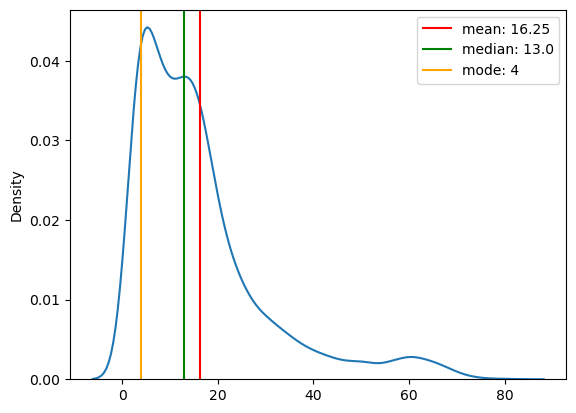

In [16]:
sns.kdeplot(len_series)
plt.axvline(len_series.mean(), color = "red",
            label = f"mean: {round(len_series.mean(),2)}")
plt.axvline(len_series.median(), color = "green",
            label = f"median: {round(len_series.median(),2)}")
plt.axvline(len_series.mode()[0], color = "orange",
            label = f"mode: {round(len_series.mode()[0],2)}")
plt.legend()
plt.show()

In [15]:
# Number of unique words in X_train
vocab = []
for review in X_train:
  vocab.extend(review.split())
len(set(vocab))

10726

In [16]:
vocab

['definitely',
 'enjoable',
 'place',
 'jaipur',
 'good',
 'food',
 'good',
 'service',
 'food',
 'really',
 'nice',
 'cocktail',
 'crazy',
 'af',
 'come',
 'place',
 'day',
 'love',
 'food',
 'excellent',
 'service',
 'excellent',
 'foodthe',
 'oder',
 'chiken',
 'birayani',
 'paneer',
 'tikka',
 'masala',
 'naan',
 'roti',
 'thank',
 'kcco',
 'nice',
 'staff',
 'great',
 'food',
 'cute',
 'cosy',
 'ambience',
 'lot',
 'experimental',
 'option',
 'amazing',
 'taste',
 'falafel',
 'salad',
 'pizza',
 'awesome',
 'place',
 'amazing',
 'wonderful',
 'food',
 'awesome',
 'atmosphere',
 'view',
 'breath',
 'taking',
 'veg',
 'maggi',
 'one',
 'good',
 'thing',
 'go',
 'amazing',
 'view',
 'best',
 'place',
 'visit',
 'awesome',
 'placei',
 'ordered',
 'gatta',
 'masala',
 'paneer',
 'delicious',
 'taking',
 'also',
 'helpful',
 'good',
 'photo',
 'preparation',
 'diff',
 'order',
 'excessive',
 'salt',
 'partially',
 'cooked',
 'bhoot',
 'ghatiya',
 'packing',
 'hai',
 'paisa',
 'bhoot',
 

In [17]:
# Find average number of tokens (words) in training
sum([len(review.split()) for review in X_train])/len(X_train)

16.254773439726417

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization  #https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=10726, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=17, # how long should the output sequence of tokens be?
                                    pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [69]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [70]:
text_vectorizer

In [71]:
# Create sample sentence and tokenize it
sample_sentence = X_train.iloc[4]
print(sample_sentence)
list(text_vectorizer([sample_sentence]).numpy()[0])

best place visit awesome placei ordered gatta masala paneer delicious taking also helpful good


[15, 4, 16, 36, 2170, 24, 1142, 121, 41, 29, 535, 13, 188, 3, 0, 0, 0]

In [84]:
text_vectorizer([sample_sentence]).numpy()[0]

array([  15,    4,   16,   36, 2170,   24, 1142,  121,   41,   29,  535,
         13,  188,    3,    0,    0,    0], dtype=int64)

In [30]:
ss= text_vectorizer(["Food is mainly composed of water, lipids, proteins, and carbohydrates."])

In [83]:
ss

<tf.Tensor: shape=(1, 17), dtype=int64, numpy=
array([[   2,    1, 1752,    1,    1,  228,    1,    1,    1,    1,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)>

In [32]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10726
Top 5 most common words: ['', '[UNK]', 'food', 'good', 'place']
Bottom 5 least common words: ['aagya', 'aage', 'aagaya', 'aadiivaasii', 'aache']


In [34]:
corpus = []
for review in X_train:
  corpus.append(list(text_vectorizer([review]).numpy()[0]))

In [85]:
#corpus[:4]
#len(corpus)
list(text_vectorizer([review]).numpy()[0])

[11, 2, 3, 400, 142, 126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [72]:
model = gensim.models.Word2Vec(
    vector_size = 128,
    window=2,
    min_count=0,
    sg=1
)

In [73]:
model.build_vocab(corpus)

In [74]:
model.corpus_count

7018

In [80]:
len(model.wv)

8380

In [63]:
word_vectors

In [46]:
model.train(corpus, total_examples=model.corpus_count, epochs=25)

(1778519, 2982650)

In [47]:
len(text_vectorizer.get_vocabulary())

10726

In [48]:
len(model.wv.index_to_key)

8380

In [42]:
text_vectorizer.get_vocabulary()[10725]

'aache'

In [43]:
len(set(range(0, 10726)) - set(model.wv.key_to_index.keys()))

2346

In [87]:
# https://github.com/RaRe-Technologies/gensim/wiki/Using-Gensim-Embeddings-with-Keras-and-Tensorflow

from tensorflow.keras.layers import Embedding

def gensim_to_keras_embedding(model,input_len = 17, train_embeddings=False):
    """Get a Keras 'Embedding' layer with weights set from Word2Vec model's learned word embeddings.

    Parameters
    ----------
    train_embeddings : bool
        If False, the returned weights are frozen and stopped from being updated.
        If True, the weights can / will be further updated in Keras.

    Returns
    -------
    `keras.layers.Embedding`
        Embedding layer, to be used as input to deeper network layers.

    """
    keyed_vectors = model.wv  # structure holding the result of training
    weights = keyed_vectors.vectors  # vectors themselves, a 2D numpy array
    index_to_key = keyed_vectors.index_to_key  # which row in `weights` corresponds to which word?

    layer = Embedding(
        input_dim=weights.shape[0],
        output_dim=weights.shape[1],
        weights=[weights],
        trainable=train_embeddings,
        input_length = input_len
    )
    return layer

In [88]:
embedding = gensim_to_keras_embedding(model)

In [89]:
# Get a random sentence from training set
import random
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
overall perfect experience im happy frequent consumer      

Embedded version:


<tf.Tensor: shape=(1, 17, 128), dtype=float32, numpy=
array([[[ 0.00469486,  0.00460428, -0.00203377, ..., -0.00388695,
         -0.00688968, -0.00275155],
        [ 0.00558798, -0.00689156,  0.00250641, ...,  0.00767071,
         -0.00650883,  0.0047723 ],
        [ 0.00110294,  0.00384858,  0.00402723, ..., -0.00461145,
          0.00584636, -0.00567167],
        ...,
        [-0.00041893,  0.00018471,  0.00398699, ...,  0.00227689,
         -0.00385377,  0.00343608],
        [-0.00041893,  0.00018471,  0.00398699, ...,  0.00227689,
         -0.00385377,  0.00343608],
        [-0.00041893,  0.00018471,  0.00398699, ...,  0.00227689,
         -0.00385377,  0.00343608]]], dtype=float32)>

In [91]:
from tensorflow.keras import layers

input = layers.Input(shape = (1,), dtype = "string")
tv = text_vectorizer(input)
ebd = embedding(tv)
ga = layers.GlobalAveragePooling1D()(ebd)
# d1 = layers.Dense(64, activation = "relu")(ga)
output = layers.Dense(1, activation = "sigmoid")(ga)

model = tf.keras.Model(inputs = input, outputs = output)

In [92]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 17)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 17, 128)           1072640   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1072769 (4.09 MB)
Trainable params: 129 (516.00

In [93]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

# train_sentences, val_sentences, train_labels, val_labels

model.fit(X_train, y_train, epochs = 5)


Epoch 1/5



InvalidArgumentError: Graph execution error:

Detected at node model/embedding/embedding_lookup defined at (most recent call last):
  File "C:\Users\palash\anaconda3\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\palash\anaconda3\lib\runpy.py", line 86, in _run_code

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\palash\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\palash\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\Users\palash\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Users\palash\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once

  File "C:\Users\palash\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "C:\Users\palash\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "C:\Users\palash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell

  File "C:\Users\palash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell

  File "C:\Users\palash\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\palash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async

  File "C:\Users\palash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes

  File "C:\Users\palash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code

  File "C:\Users\palash\AppData\Local\Temp\ipykernel_10896\2745785850.py", line 9, in <module>

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\palash\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py", line 272, in call

indices[15,9] = 8979 is not in [0, 8380)
	 [[{{node model/embedding/embedding_lookup}}]] [Op:__inference_train_function_311193]

In [94]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization  #https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=17) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True)
text_vectorizer.adapt(X_train)

In [95]:
from tensorflow.keras.layers import Embedding
ebd_layer = Embedding(
    input_dim = len(text_vectorizer.get_vocabulary()),
    output_dim = 128,
    input_length = 17
)

In [96]:
ebd_layer.get_weights()

[]

In [97]:
input = tf.keras.layers.Input(shape = (1,), dtype= "string")
tv = text_vectorizer(input)
ebd = ebd_layer(tv)
ga = tf.keras.layers.GlobalAveragePooling1D()(ebd)
# d1 = tf.keras.layers.Dense(16, activation = "relu")(ga)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(ga)

model_ebd = tf.keras.Model(inputs = input, outputs = output)
model_ebd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 17)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 17, 128)           1373184   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1373313 (5.24 MB)
Trainable params: 1373313 (

In [59]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Embedding
ebd_layer = Embedding(
    input_dim = len(text_vectorizer.get_vocabulary()),
    output_dim = 128,
    input_length = 17
)
input = tf.keras.layers.Input(shape = (1,), dtype= "string")
tv = text_vectorizer(input)
ebd = ebd_layer(tv)
ga = tf.keras.layers.GlobalAveragePooling1D()(ebd)
# d1 = tf.keras.layers.Dense(16, activation = "relu")(ga)
output = tf.keras.layers.Dense(1, activation = "sigmoid")(ga)

model_ebd = tf.keras.Model(inputs = input, outputs = output)

model_ebd.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)
result_ebd = model_ebd.fit(X_train, y_train, epochs = 4, validation_data = (X_valid, y_valid))

Epoch 1/4
220/220 [==============================] - 6s 25ms/step - loss: 0.5194 - accuracy: 0.8058 - val_loss: 0.3551 - val_accuracy: 0.8949
Epoch 2/4
220/220 [==============================] - 6s 25ms/step - loss: 0.2740 - accuracy: 0.9248 - val_loss: 0.2488 - val_accuracy: 0.9124
Epoch 3/4
220/220 [==============================] - 5s 25ms/step - loss: 0.1970 - accuracy: 0.9410 - val_loss: 0.2212 - val_accuracy: 0.9201
Epoch 4/4
220/220 [==============================] - 6s 27ms/step - loss: 0.1600 - accuracy: 0.9521 - val_loss: 0.2155 - val_accuracy: 0.9265


In [60]:
y_pred_ebd = model_ebd.predict(X_valid)
y_pred_ebd[:5]

74/74 [==============================] - 0s 2ms/step


array([[0.73557264],
       [0.9605301 ],
       [0.95730984],
       [0.16641568],
       [0.96533275]], dtype=float32)

In [61]:
np.where(y_pred_ebd>=0.5, 1,0)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [62]:
y_pred_ebd_flat = np.round(y_pred_ebd).flatten()
y_pred_ebd_flat[:5]

array([1., 1., 1., 0., 1.], dtype=float32)

In [63]:
y_valid[:5]

6741    1
5158    1
102     1
2167    1
1130    1
Name: sentiment, dtype: int64

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_valid, y_pred_ebd_flat))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1410
           1       0.91      0.90      0.91       930

    accuracy                           0.93      2340
   macro avg       0.92      0.92      0.92      2340
weighted avg       0.93      0.93      0.93      2340



In [65]:
ebd_layer.get_weights()[0].shape

(10728, 128)

In [66]:
ebd_layer.get_weights()[0]

array([[ 0.01325517, -0.02686268, -0.02637479, ...,  0.00028612,
         0.00683883, -0.05066485],
       [-0.04962243,  0.03594908, -0.02034652, ...,  0.01815004,
         0.03257399, -0.04494863],
       [-0.04467124,  0.07065123,  0.03170334, ...,  0.00147509,
         0.01003034, -0.07288383],
       ...,
       [ 0.0547647 , -0.04700103, -0.02073087, ..., -0.00491996,
         0.07418086,  0.07791632],
       [-0.08009841,  0.07165869,  0.05388992, ...,  0.07147376,
        -0.07955992, -0.03975553],
       [-0.02444868,  0.10294838,  0.09063026, ...,  0.09739957,
        -0.07856586, -0.0991958 ]], dtype=float32)

In [67]:
import nltk
import re
# import emoji
import string
from nltk.stem import WordNetLemmatizer
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\palash\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\palash\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\palash\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\palash\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\palash\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

True

In [70]:
with open(r"C:\Users\palash\Downloads\sw_new.txt", "r") as f:
  sw_new = f.read()
sw_new = sw_new.split("\n")

In [71]:
def text_cleaner(text, sw = sw_new):
  import nltk
  import re
  # import emoji
  import string
  from nltk.stem import WordNetLemmatizer

  # mobile_regex = "(\+*)((0[ -]*)*|((91 )*))((\d{12})+|(\d{10})+)|\d{5}([- ]*)\d{6}"
  url_regex = "((http|https|www)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
  space_regex = "\s\s+"
  # remove url
  text = re.sub(url_regex, "", text)
  # remove mobile
  # text = re.sub(mobile_regex, "", text)
  # lower casing
  text = text.lower()
  # remove emoji & punctuation & numbers
  text = "".join([i for i in text if (ord(i) in range(97,123)) | (i == " ")])
  # remove multiple spaces
  text = re.sub(space_regex, " ", text)

  # stopword removal
  text = [i for i in text.split() if i not in sw]
  # lemmatizing
  lemma = WordNetLemmatizer()
  text = " ".join([lemma.lemmatize(i) for i in text])

  return text

In [72]:
test = "I went here alone. They don't having table for one person. Overall I think any of the other restaurants in the same block would be better choice. I hered many times, the name of chhabra's from Jaipur guys. Terrible."
clean_text = text_cleaner(test)

In [73]:
clean_text

'went alone dont table one person overall think restaurant block would better choice hered many time name chhabras jaipur guy terrible'

In [74]:
model_ebd(tf.constant([clean_text]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.89597994]], dtype=float32)>

In [75]:
y_pred = model_ebd.predict(X_valid)

74/74 [==============================] - 0s 2ms/step


In [76]:
from tensorflow.keras import layers
max_vocab_length = len(text_vectorizer.get_vocabulary())
max_length = 14
embedding = layers.Embedding(input_dim= max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize uniform
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [77]:
from tensorflow.keras import layers

input = layers.Input(shape = (1,), dtype = "string")
tv = text_vectorizer(input)
ebd = embedding(tv)
ga = layers.GlobalAveragePooling1D()(ebd)
# d1 = layers.Dense(64, activation = "relu")(ga)
output = layers.Dense(1, activation = "sigmoid")(ga)

In [78]:
model = tf.keras.Model(inputs = input, outputs = output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 17)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 17, 128)           1373184   
                                                                 
 global_average_pooling1d_3  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1373313 (5.24 MB)
Trainable params: 1373313 (

In [79]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

# train_sentences, val_sentences, train_labels, val_labels

model.fit(X_train, y_train, epochs = 5, validation_data = (X_valid, y_valid))

Epoch 1/5
220/220 [==============================] - 7s 29ms/step - loss: 0.5227 - accuracy: 0.8046 - val_loss: 0.3571 - val_accuracy: 0.8974
Epoch 2/5
220/220 [==============================] - 5s 24ms/step - loss: 0.2750 - accuracy: 0.9241 - val_loss: 0.2492 - val_accuracy: 0.9124
Epoch 3/5
220/220 [==============================] - 5s 24ms/step - loss: 0.1974 - accuracy: 0.9409 - val_loss: 0.2215 - val_accuracy: 0.9205
Epoch 4/5
220/220 [==============================] - 5s 24ms/step - loss: 0.1603 - accuracy: 0.9527 - val_loss: 0.2158 - val_accuracy: 0.9256
Epoch 5/5
220/220 [==============================] - 6s 26ms/step - loss: 0.1362 - accuracy: 0.9602 - val_loss: 0.2117 - val_accuracy: 0.9209


In [80]:
y_pred = model.predict(X_valid)

74/74 [==============================] - 0s 2ms/step


In [81]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score for class 1
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred)
  model_results = {"Accuracy": [np.round(model_accuracy,2)],
                  "Precision": [np.round(model_precision[1]* 100,2)],
                  "Recall": [np.round(model_recall[1]* 100,2)],
                  "F1_score": [np.round(model_f1[1]* 100,2)]}
  return model_results

In [82]:
# Get baseline results
model_results = calculate_results(y_true=y_valid,
                                     y_pred=tf.round(y_pred_ebd))
model_results

{'Accuracy': [92.65],
 'Precision': [91.47],
 'Recall': [89.89],
 'F1_score': [90.67]}

In [83]:
result_df = pd.DataFrame({
        "Description": [],
        "Precision": [],
        "Recall": [],
        "F1_score":[],
        "Accuracy":[],
        "Pred_time_in_seconds" : []
    })

In [84]:
import time
def result_log(model,text,X_test, y_true,result_df):
  start_time = time.time()
  y_pred = model.predict(X_test)
  end_time = time.time()
  pred_time = end_time - start_time
  result_dict = calculate_results(y_true=y_valid,y_pred=tf.round(y_pred))
  result_dict["Description"] = text
  result_dict["Pred_time_in_seconds"] = [pred_time]
  temp_df = pd.DataFrame(data = result_dict)
  result_df = pd.concat([result_df, temp_df]).reset_index(drop = True)

  return result_df

In [87]:
import joblib
model_nb = joblib.load(r"C:\Users\palash\Downloads\food_review_nb.joblib")
model_nb

KeyError: 0

In [88]:
import joblib

In [91]:
model_nb = joblib.load(r"C:\Users\palash\Downloads\food_review_nb.joblib")
model_nb

KeyError: 0

In [92]:
result_df = result_log(model_ebd,"Embedding model",X_valid, y_valid, result_df)
result_df

74/74 [==============================] - 0s 2ms/step


,Description,Precision,Recall,F1_score,Accuracy,Pred_time_in_seconds
0,Embedding model,91.47,89.89,90.67,92.65,0.214193


In [93]:
model_ebd.get_layer("embedding_2").get_weights()[0]


array([[ 0.01325517, -0.02686268, -0.02637479, ...,  0.00028612,
         0.00683883, -0.05066485],
       [-0.04962243,  0.03594908, -0.02034652, ...,  0.01815004,
         0.03257399, -0.04494863],
       [-0.04467124,  0.07065123,  0.03170334, ...,  0.00147509,
         0.01003034, -0.07288383],
       ...,
       [ 0.0547647 , -0.04700103, -0.02073087, ..., -0.00491996,
         0.07418086,  0.07791632],
       [-0.08009841,  0.07165869,  0.05388992, ...,  0.07147376,
        -0.07955992, -0.03975553],
       [-0.02444868,  0.10294838,  0.09063026, ...,  0.09739957,
        -0.07856586, -0.0991958 ]], dtype=float32)

In [94]:
embed_weights = model_ebd.get_layer("embedding_2").get_weights()[0]
print(embed_weights.shape)

(10728, 128)


In [95]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")
words_in_vocab = text_vectorizer.get_vocabulary()
# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

In [96]:
tf.random.set_seed(42)
from tensorflow.keras import layers
max_vocab_length = len(text_vectorizer.get_vocabulary())
max_length = 17

model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Create rnn model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_1_embedding(x)
# print(x.shape)
x = layers.Dropout(0.2)(x)
x = layers.SimpleRNN(4, return_sequences=True, dropout = 0.2, kernel_regularizer='l1')(x) # return vector for whole sequence
# x = layers.SimpleRNN(8, return_sequences=True, dropout = 0.4, kernel_regularizer='l1')(x)
x = layers.SimpleRNN(4, dropout = 0.2, kernel_regularizer='l1')(x)
# print(x.shape)
x = layers.Dropout(0.2)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_RNN")
model_1.summary()

Model: "model_1_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 17)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 17, 128)           1373184   
                                                                 
 dropout (Dropout)           (None, 17, 128)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 17, 4)             532       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 4)                 36        
                                                       

In [97]:
tf.random.set_seed(42)
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),
                metrics=["accuracy"])

# Fit model
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=6,
                              validation_data=(X_valid, y_valid)
                              )

Epoch 1/6
220/220 [==============================] - 10s 33ms/step - loss: 1.1302 - accuracy: 0.5556 - val_loss: 0.9600 - val_accuracy: 0.6026
Epoch 2/6
220/220 [==============================] - 7s 31ms/step - loss: 0.8381 - accuracy: 0.6358 - val_loss: 0.7457 - val_accuracy: 0.6739
Epoch 3/6
220/220 [==============================] - 7s 30ms/step - loss: 0.6617 - accuracy: 0.7318 - val_loss: 0.6627 - val_accuracy: 0.7197
Epoch 4/6
220/220 [==============================] - 7s 31ms/step - loss: 0.5665 - accuracy: 0.7958 - val_loss: 0.6482 - val_accuracy: 0.7248
Epoch 5/6
220/220 [==============================] - 7s 31ms/step - loss: 0.5035 - accuracy: 0.8319 - val_loss: 0.6535 - val_accuracy: 0.7363
Epoch 6/6
220/220 [==============================] - 7s 30ms/step - loss: 0.4574 - accuracy: 0.8515 - val_loss: 0.6647 - val_accuracy: 0.7333


In [98]:
result_df = result_log(model_1,"rnn model",X_valid, y_valid, result_df)
result_df

74/74 [==============================] - 0s 3ms/step


,Description,Precision,Recall,F1_score,Accuracy,Pred_time_in_seconds
0,Embedding model,91.47,89.89,90.67,92.65,0.214193
1,rnn model,71.13,55.38,62.27,73.33,0.528572


In [99]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(8, return_sequences=True, dropout = 0.4, kernel_regularizer='l1')(x) # return vector for whole sequence
x = layers.LSTM(8)(x)
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
model_2.summary()

(None, 17, 128)
(None, 8)
Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 17)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 17, 128)           1373184   
                                                                 
 lstm (LSTM)                 (None, 17, 8)             4384      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                            

In [100]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_2_history = model_2.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_valid, y_valid)
                              )

Epoch 1/2
220/220 [==============================] - 11s 35ms/step - loss: 1.6265 - accuracy: 0.8219 - val_loss: 0.3311 - val_accuracy: 0.9064
Epoch 2/2
220/220 [==============================] - 7s 31ms/step - loss: 0.2677 - accuracy: 0.9272 - val_loss: 0.2771 - val_accuracy: 0.9060


In [101]:
result_df = result_log(model_2,"lstm model",X_valid, y_valid, result_df)
result_df

74/74 [==============================] - 1s 4ms/step


,Description,Precision,Recall,F1_score,Accuracy,Pred_time_in_seconds
0,Embedding model,91.47,89.89,90.67,92.65,0.214193
1,rnn model,71.13,55.38,62.27,73.33,0.528572
2,lstm model,89.89,86.02,87.91,90.60,0.970244


In [105]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub

In [106]:
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2") # load Universal Sentence Encoder
embed_samples = embed(["When you call the universal sentence encoder on a sentence" ,"it turns it into numbers."])

print(embed_samples)

tf.Tensor(
[[ 0.06244392 -0.05404239 -0.01550858 ... -0.01991867  0.03076827
   0.00064757]
 [-0.03539826 -0.09636232 -0.00950034 ... -0.02322183  0.01694256
  -0.0294972 ]], shape=(2, 512), dtype=float32)


In [107]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [108]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
import tensorflow_hub as hub
from tensorflow.keras import layers
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [109]:
# Create model using the Sequential API

import tensorflow as tf
model_3 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_3_USE")

# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0008),
                metrics=["accuracy"])

model_3.summary()

Model: "model_3_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [110]:
# Train a classifier on top of pretrained embeddings

model_3_history = model_3.fit(X_train,
                              y_train,
                              epochs=4,
                              validation_data=(X_valid, y_valid)
                              )

Epoch 1/4
220/220 [==============================] - 5s 13ms/step - loss: 0.3386 - accuracy: 0.8725 - val_loss: 0.2164 - val_accuracy: 0.9231
Epoch 2/4
220/220 [==============================] - 3s 12ms/step - loss: 0.1951 - accuracy: 0.9337 - val_loss: 0.2001 - val_accuracy: 0.9231
Epoch 3/4
220/220 [==============================] - 2s 11ms/step - loss: 0.1829 - accuracy: 0.9373 - val_loss: 0.1960 - val_accuracy: 0.9226
Epoch 4/4
220/220 [==============================] - 2s 10ms/step - loss: 0.1763 - accuracy: 0.9386 - val_loss: 0.1946 - val_accuracy: 0.9248


In [111]:
result_df = result_log(model_3,"use model",X_valid, y_valid, result_df)
result_df

74/74 [==============================] - 1s 7ms/step


,Description,Precision,Recall,F1_score,Accuracy,Pred_time_in_seconds
0,Embedding model,91.47,89.89,90.67,92.65,0.214193
1,rnn model,71.13,55.38,62.27,73.33,0.528572
2,lstm model,89.89,86.02,87.91,90.60,0.970244
3,use model,90.28,90.86,90.57,92.48,0.977688


In [112]:
tf.saved_model.save(model_3, "Downloads")

INFO:tensorflow:Assets written to: Downloads\assets


INFO:tensorflow:Assets written to: Downloads\assets


In [113]:
def prediction(text, model):
  text = text_cleaner(text)
  y_pred = model.predict([text])
  print(("Negative Review" if y_pred[0] == 1 else "Positive Review"))

In [114]:
model_nb = joblib.load(r"C:\Users\palash\Downloads\food_review_nb.joblib")

C:\Users\palash\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


KeyError: 0

In [115]:
text1 = "atmosphere is ok but food is not good"
text2 = "atmosphere is ok but food is bad"